In [9]:
from svg import *
from dtw import *
from skimage import io
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
from pyts.metrics import dtw

# Set default parameters for plots
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['image.cmap'] = 'gray'

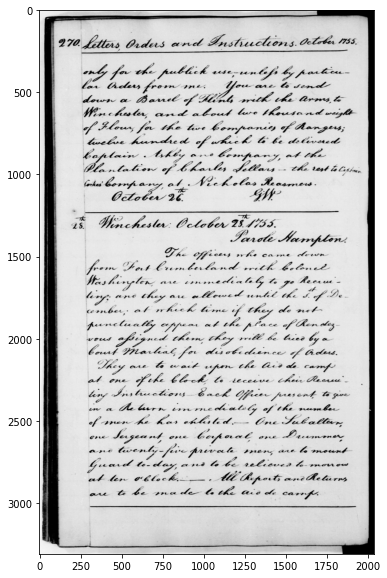

In [10]:
p270svg = "../res/ground-truth/locations/270.svg"
svg = SVG(p270svg)

p270jpg = "../res/images/270.jpg"
img = io.imread(p270jpg, as_gray=True)

plt.imshow(img)

In [11]:
words, masks = svg.words_masks(img)

/home/julius/Git/Pattern-Recognition-As1/03_Keyword_Spotting/src/svg.py:99: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(words), np.array(masks)


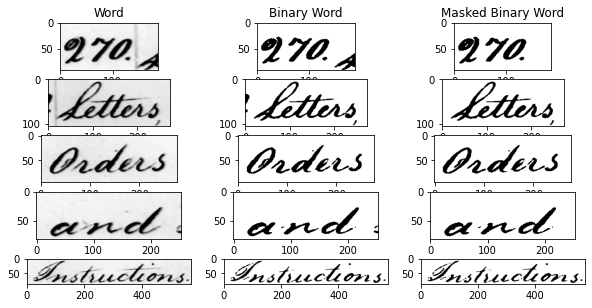

In [23]:
y = 5
fig, axs = plt.subplots(y, 3, figsize=(10, y))
axs[0, 0].set_title('Word')
axs[0, 1].set_title('Binary Word')
axs[0, 2].set_title('Masked Binary Word')

for i in range(y):
    w = words[i]
    otsu = w > threshold_otsu(w)
    masked = otsu | ~ masks[i]
    
    axs[i, 0].imshow(w)
    axs[i, 1].imshow(otsu)
    axs[i ,2].imshow(masked)

Distance:  0.6594641158781993


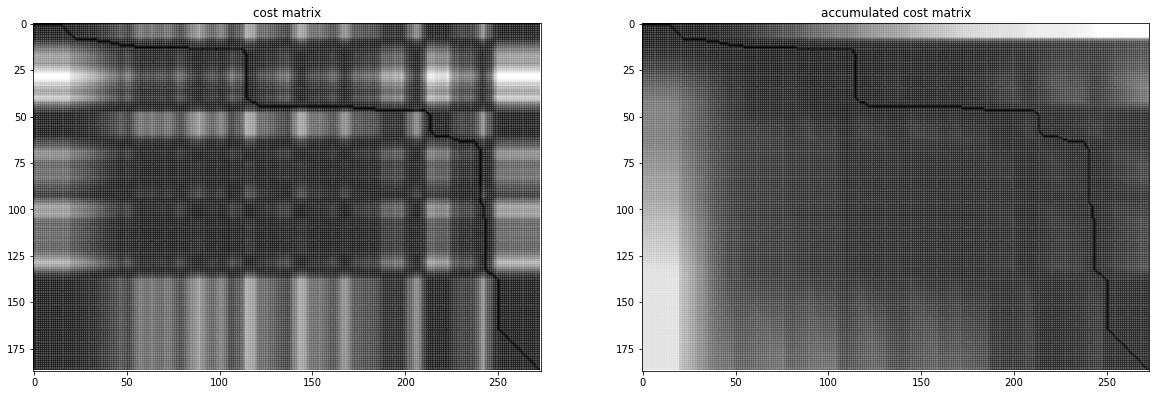

In [6]:
# Proof of Concept

# As it stands now, we just need to load the transcriptions, mapped against some dtw methods like
# * `fraction_black`
# * `upper_contour*
# * ...
#
# They can then be compared against the testing set where we choose the "best matching" transcription as label.

w0 = (words[0] > threshold_otsu(words[0])) | ~masks[0]
w1 = (words[1] > threshold_otsu(words[1])) | ~masks[1]

x = fraction_black(w0)
y = fraction_black(w1)

dist, cost_mat, acc_cost_mat, path = dtw(x, y, method="classic", return_cost=True, return_accumulated=True, return_path=True)

print("Distance: ", dist)

path_drawing = np.zeros((y.size, x.size))
path_drawing[tuple(path)[::-1]] = -1.
path_drawing = path_drawing.T

X,Y = np.meshgrid(np.arange(x.size),np.arange(y.size))

fig, (left, right) = plt.subplots(1, 2, figsize=(20, 10))
left.set_title("cost matrix")
right.set_title("accumulated cost matrix")

left.imshow(cost_mat)
left.pcolor(path_drawing, alpha=0.1)

right.imshow(acc_cost_mat)
right.pcolor(path_drawing, alpha=0.1)